<a href="https://colab.research.google.com/github/MohamedKKhalaf/GANs/blob/main/GAN_Assignment_3_20180438_20180183.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras import layers

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

#Encoder Network
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
##
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

#Decoder Network
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Autoencoder
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [ ]:
from keras.datasets import mnist
import numpy as np

In [ ]:
from keras.callbacks import TensorBoard
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0984 - val_loss: 0.0970
Epoch 2/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0980 - val_loss: 0.0965
Epoch 3/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0977 - val_loss: 0.0962
Epoch 4/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0974 - val_loss: 0.0959
Epoch 5/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0971 - val_loss: 0.0959
Epoch 6/50
469/469 [==============================] - 6s 13ms/step - loss: 0.0968 - val_loss: 0.0951
Epoch 7/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0965 - val_loss: 0.0949
Epoch 8/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0963 - val_loss: 0.0956
Epoch 9/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0960 - val_loss: 0.0948
Epoch 10/50
469/469 [==============================] - 6s 12ms/step - loss: 0.0958 - val_lo

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

In [ ]:
import matplotlib.pyplot as plt

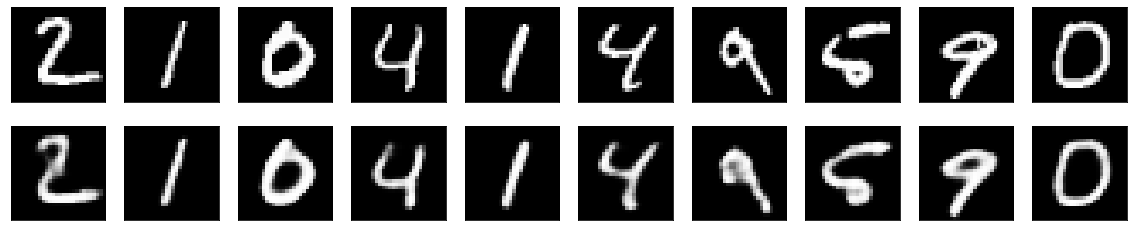

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

print (encoded_imgs.shape)

(10000, 4, 4, 8)


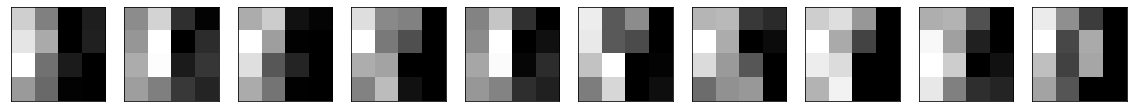

In [ ]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i,:,:,4].reshape((4 , 4)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

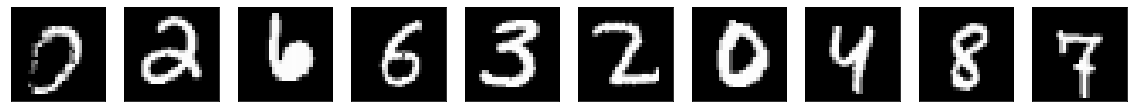

In [ ]:
import random
k=10

#selecting random samples
test_sample=random.sample(list(x_test),k)

plt.figure(figsize=(20, 4))
for i in range(1, k + 1):
    # Display original
    ax = plt.subplot(2, k, i)
    plt.imshow(test_sample[i-1].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
encoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584 

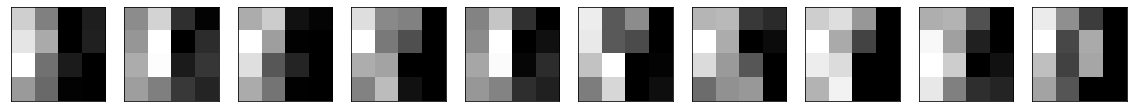

In [ ]:
sample_encoded_imgs=encoder.predict(np.array(test_sample))
plt.figure(figsize=(20, 8))
for i in range(1, k + 1):
    ax = plt.subplot(1, k, i)
    plt.imshow(encoded_imgs[i,:,:,4].reshape((4 , 4)))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 16), dtype=tf.float32, name=None), name='up_sampling2d_2/resize/ResizeNearestNeighbor:0', description="created by layer 'up_sampling2d_2'")


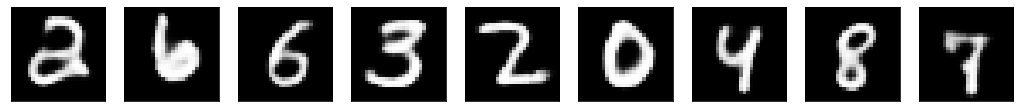

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 4, 4, 8)]         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 up_sampling2d (UpSampling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 8, 8, 8)           584       
                                                                 
 up_sampling2d_1 (UpSampling  (None, 16, 16, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 16)        1168

In [ ]:
sample_encoded_imgs_shape = keras.Input(shape=(4,4,8))

decoder3 = autoencoder.layers[-7](sample_encoded_imgs_shape)
decoder3 = autoencoder.layers[-6](decoder3)
decoder3 = autoencoder.layers[-5](decoder3)
decoder3 = autoencoder.layers[-4](decoder3)
decoder3 = autoencoder.layers[-3](decoder3)
decoder3 = autoencoder.layers[-2](decoder3)
decoded2 = autoencoder.layers[-1](decoder3)

Deco=keras.Model(sample_encoded_imgs_shape,decoded2)
print(decoder3)

sample_decoded_imgs=Deco.predict(sample_encoded_imgs)

plt.figure(figsize=(20, 4))
for i in range(1, k ):
    ax = plt.subplot(2, k, i + k)
    plt.imshow(sample_decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Deco.summary()